> # **Project - 2 | Spam Classifier + Error Bucket Analysis**

> Objective

- Automatically classify messages as Spam or Ham (Not Spam).

> Important Metrics that should be used with this problem

   1. Precision (Spam class) → Avoid false positives.
   2. Recall (Spam class) → Catch most spam.
   3. F1 Score
   4. Cost-sensitive error rate

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jwick1","key":"2e8162492089e74b593527e9a1093dee"}'}

After uploading `kaggle.json`, run the following cells to move it to the correct location and set permissions.

In [2]:
# Create the .config/kaggle directory if it doesn't exist
!mkdir -p ~/.config/kaggle/

# Move the uploaded kaggle.json to the .config/kaggle directory
!mv kaggle.json ~/.config/kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.config/kaggle/kaggle.json

You can verify the file is in place and has the correct permissions by listing the contents of the `~/.kaggle/` directory:

In [3]:
!ls -l ~/.config/kaggle/

total 4
-rw------- 1 root root 62 Feb 23 13:21 kaggle.json


In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [5]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files('uciml/sms-spam-collection-dataset', path='/content/sample_data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


In [6]:
# importing the libraries

import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
# reading the dataset from files
df = pd.read_csv('/content/sample_data/spam.csv', encoding='ISO-8859-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(4)

,target,text
64,ham,Ok lar i double check wif da hair dresser alre...
3592,ham,"Sorry, I'll call later"
3126,ham,Thats cool. i liked your photos. You are very ...
4234,spam,FREEMSG: Our records indicate you may be entit...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

,0
target,0
text,0


In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df['target'].value_counts()

,count
target,
0,4516
1,653


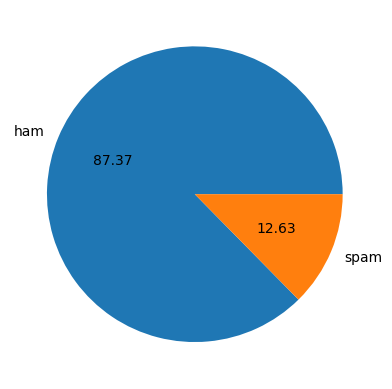

In [19]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show()

In [20]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# checking the number of characters, words, and sentences
df_updated = df.copy()

df_updated['num_of_chars'] = df['text'].apply(len)

df_updated['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

df_updated['num_of_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

df_updated.head()

,target,text,num_of_chars,num_of_words,num_of_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


> .loc is a label-based indexer used to:
- Select rows
- Select columns
- Filter with conditions
- Assign values safely

> Use .loc whenever:
- Filtering
- Selecting multiple columns
- Assigning values
- Avoiding chained indexing

In [22]:
# number of char, word and sent for ham(0)

df_updated.loc[df_updated['target'] == 0, ['num_of_chars','num_of_words','num_of_sents']].describe() # Select rows where target = 0

,num_of_chars,num_of_words,num_of_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# number of char, word and sent for spam(1)
df_updated.loc[df_updated['target'] == 1, ['num_of_chars','num_of_words','num_of_sents']].describe()

,num_of_chars,num_of_words,num_of_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


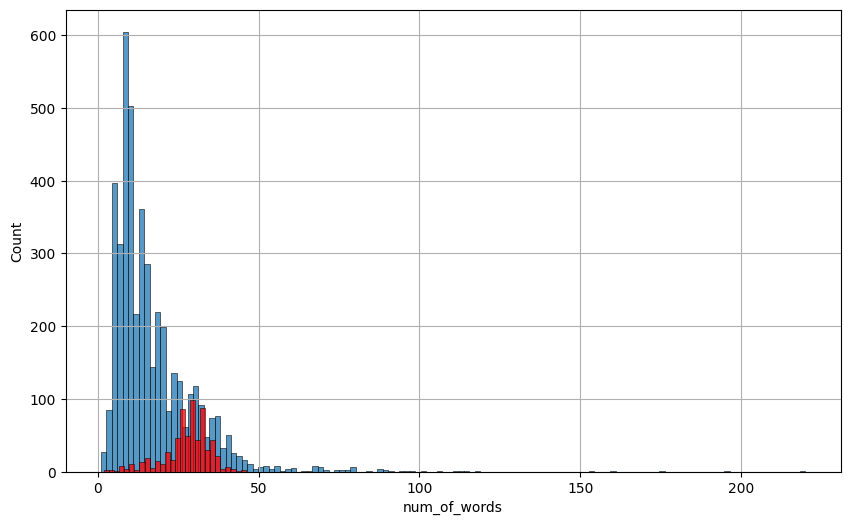

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df_updated[df_updated['target'] == 0]['num_of_words'])
sns.histplot(df_updated[df_updated['target'] == 1]['num_of_words'],color='red')
plt.grid()
plt.show()

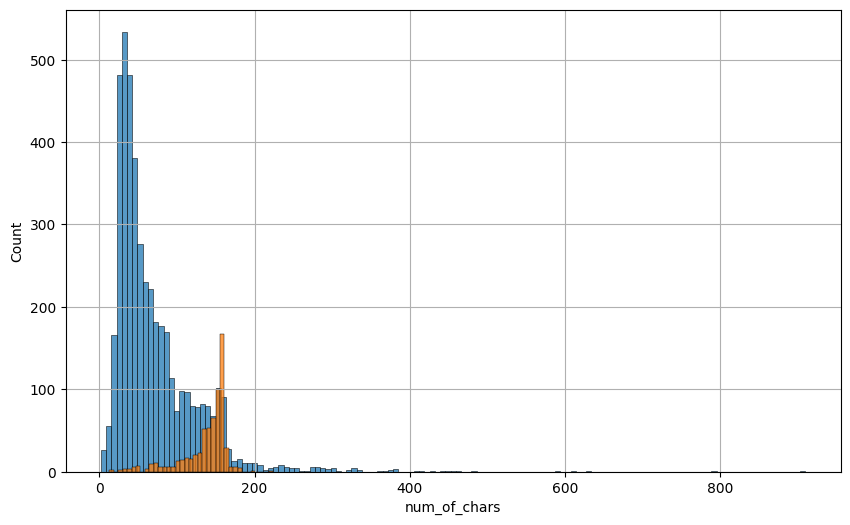

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df_updated[df_updated['target'] == 0]['num_of_chars'])
sns.histplot(df_updated[df_updated['target'] == 1]['num_of_chars'])
plt.grid()

> Pairplot - Shows feature – feature distribution
- Detects class separability
- Visual scatter
- Spam messages may cluster in higher num_of_chars
- Spam may have more words

> - From Pairplot:
    1. Spam messages appear slightly longer
    2. Length-based features provide signal
    3. But not enough alone → need text features (TF-IDF)

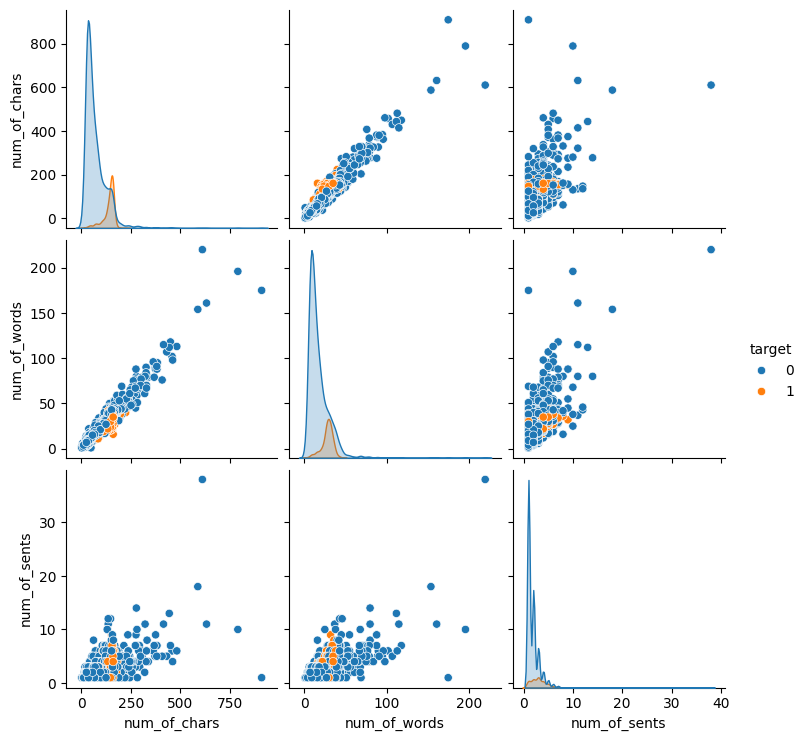

In [26]:
sns.pairplot(df_updated,hue='target')
plt.grid()

> Heatmap - How strongly each numeric feature is linearly related to others
- Shows feature – feature correlation
- .corr() computes the correlation matrix
- sns.heatmap() visualizes that matrix
- annot=True shows numeric correlation values

> - Highly correlated features can:
     1. Reduce model interpretability
     2. Cause instability in linear models
     3. Make regularization more important

> - You may choose to:
     1. Drop one feature
     2. Keep both if using tree-based models
     3. Use L2 regularization to stabilize weights

<Axes: >

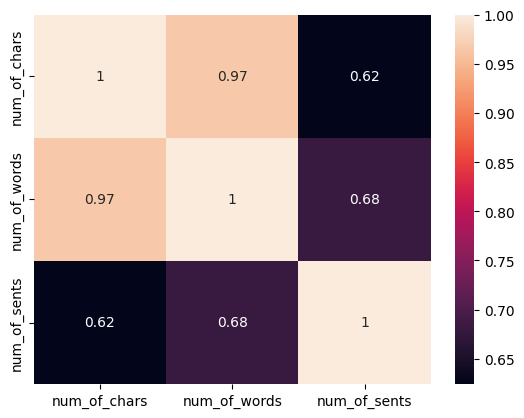

In [27]:
sns.heatmap(
    df_updated[['num_of_chars','num_of_words','num_of_sents']].corr(),
    annot=True
    )

In [28]:
import re
!pip install en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [29]:
def preprocessing(text,
                  lowercase=True,
                  remove_stopwords=False,
                  remove_punct=False,
                  lemma=False,
                  aggressive_clean=False):

    doc = nlp(text, disable=['parser','ner'])  # Use nlp.pipe() only when processing the entire column at once
    tokens = []

    for token in doc:

        if remove_stopwords and token.is_stop:
            continue

        if remove_punct and token.is_punct:
            continue

        word = token.lemma_ if lemma else token.text

        if lowercase:
            word = word.lower()

        if aggressive_clean:
            word = re.sub(r'[^a-zA-Z]', '', word)

        tokens.append(word)

    return " ".join(tokens)

> .apply() works like:
- for row in df['text']:
     transform_text(row)

In [30]:
# new df is created with updated values
df_updated['raw_text'] = df_updated['text']

df_updated['cleaned'] = df_updated['text'].apply(lambda x: preprocessing(x, lowercase=True, remove_punct=True))

df_updated['lemmatized'] = df_updated['text'].apply(lambda x: preprocessing(x, lowercase=True, remove_punct=True, lemma=True))

df_updated.loc[:, 'no_stopwords'] = df_updated['text'].apply(lambda x: preprocessing(x,
                                                                           lowercase=True,
                                                                           remove_stopwords=True,
                                                                           remove_punct=True,
                                                                           lemma=True))

df_updated.loc[:, 'fully_clean'] = df_updated['text'].apply(lambda x: preprocessing(x,
                                                                          lowercase=True,
                                                                          remove_punct=True,
                                                                          remove_stopwords=True,
                                                                          lemma=True,
                                                                          aggressive_clean=True))
df_updated.head()

,target,text,num_of_chars,num_of_words,num_of_sents,raw_text,cleaned,lemmatized,no_stopwords,fully_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,jurong point crazy available bugis n great wor...,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entry wkly comp win fa cup final tkts st...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun early hor u c,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro...",nah i do n't think he goes to usf he lives aro...,nah i do not think he go to usf he live around...,nah think go usf live,nah think go usf live


> Stratified split
- Keeps spam/ham ratio balanced in train/test.

> Cross-validation
- Reduces overfitting risk.
- Gives stable performance estimate.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def feature_train(x, y, ngram=(1,2)):

    tfidf = TfidfVectorizer(max_features=4000, ngram_range=ngram)
    x_vec = tfidf.fit_transform(x).toarray()

    x_train, x_test, y_train, y_test = train_test_split(
        x_vec, y, test_size=0.2, random_state=20, stratify=y
    )

    models = {
        "LR": LogisticRegression(max_iter=1000),
        "Linear_SVM": SVC(kernel='linear', probability=True),
        "MNB": MultinomialNB(),
        "GNB": GaussianNB(),
        "BNB": BernoulliNB()
    }

    metrics_table = {}
    confusion_matrices = {}

    for name, model in models.items():

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        metrics_table[name] = {

            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "CV Accuracy (5-fold)": cross_val_score(model, x_vec, y, cv=5).mean()
        }

        confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    results_df = pd.DataFrame(metrics_table)

    return results_df, confusion_matrices, models, tfidf, x_test, y_test



In [68]:
result_fc, conf_fc, models, tfidf_fc, x_test, y_test = feature_train(df_updated['fully_clean'], df_updated['target'])
result_fc.head()

,LR,Linear_SVM,MNB,GNB,BNB
Accuracy,0.949710,0.979691,0.972921,0.873308,0.976789
Precision,0.975904,0.974138,1.000000,0.500000,1.000000
Recall,0.618321,0.862595,0.786260,0.877863,0.816794
F1 Score,0.757009,0.914980,0.880342,0.637119,0.899160
CV Accuracy (5-fold),0.949506,0.977365,0.970014,0.864192,0.974076


In [69]:
result_raw, conf_raw, _, tfidf_raw, _, _ = feature_train(df_updated['raw_text'], df_updated['target'])
result_raw.head()

,LR,Linear_SVM,MNB,GNB,BNB
Accuracy,0.963250,0.989362,0.980658,0.941973,0.984526
Precision,1.000000,0.991803,1.000000,0.720497,1.000000
Recall,0.709924,0.923664,0.847328,0.885496,0.877863
F1 Score,0.830357,0.956522,0.917355,0.794521,0.934959
CV Accuracy (5-fold),0.966532,0.984910,0.977558,0.935191,0.982201


In [70]:
result_c, conf_c, models_c, tfidf_c, _, _ = feature_train(df_updated['cleaned'], df_updated['target'])
result_c.head()

,LR,Linear_SVM,MNB,GNB,BNB
Accuracy,0.963250,0.988395,0.980658,0.940039,0.984526
Precision,1.000000,0.991736,1.000000,0.711656,1.000000
Recall,0.709924,0.916031,0.847328,0.885496,0.877863
F1 Score,0.830357,0.952381,0.917355,0.789116,0.934959
CV Accuracy (5-fold),0.965758,0.985490,0.977365,0.933642,0.982975


In [71]:
result_lem, conf_lem, _, tfidf_lem, _, _ = feature_train(df_updated['lemmatized'], df_updated['target'])
result_lem.head()

,LR,Linear_SVM,MNB,GNB,BNB
Accuracy,0.966151,0.986460,0.981625,0.939072,0.984526
Precision,0.989796,0.975610,1.000000,0.707317,1.000000
Recall,0.740458,0.916031,0.854962,0.885496,0.877863
F1 Score,0.847162,0.944882,0.921811,0.786441,0.934959
CV Accuracy (5-fold),0.967692,0.985684,0.978138,0.934031,0.983169


In [72]:
result_ns, conf_ns, _, tfidf_ns, _, _ = feature_train(df_updated['no_stopwords'], df_updated['target'])
result_ns.head()

,LR,Linear_SVM,MNB,GNB,BNB
Accuracy,0.962282,0.984526,0.980658,0.879110,0.978723
Precision,0.979167,0.967480,1.000000,0.513158,0.990991
Recall,0.717557,0.908397,0.847328,0.893130,0.839695
F1 Score,0.828194,0.937008,0.917355,0.651811,0.909091
CV Accuracy (5-fold),0.958406,0.980846,0.975430,0.881216,0.977558


> # **Threshold Tuning (Business Trade-off)**

*   Increase threshold → higher precision
*   Decrease threshold → higher recall



In [73]:
lr = models["LR"]
probs = lr.predict_proba(x_test)[:,1]

threshold = 0.6
custom_pred = (probs >= threshold).astype(int)

print("F1:", f1_score(y_test, custom_pred))

F1: 0.6073298429319371


> # **Error Bucket Analysis**
- find the misclassified samples

In [74]:
y_pred = lr.predict(x_test)

misclassified_idx = np.where(y_pred != y_test)[0]

In [76]:
error_df = pd.DataFrame({
    "Text": df_updated.loc[y_test.index[misclassified_idx], "fully_clean"],
    "Actual": y_test.iloc[misclassified_idx],
    "Predicted": y_pred[misclassified_idx]
})

<Axes: >

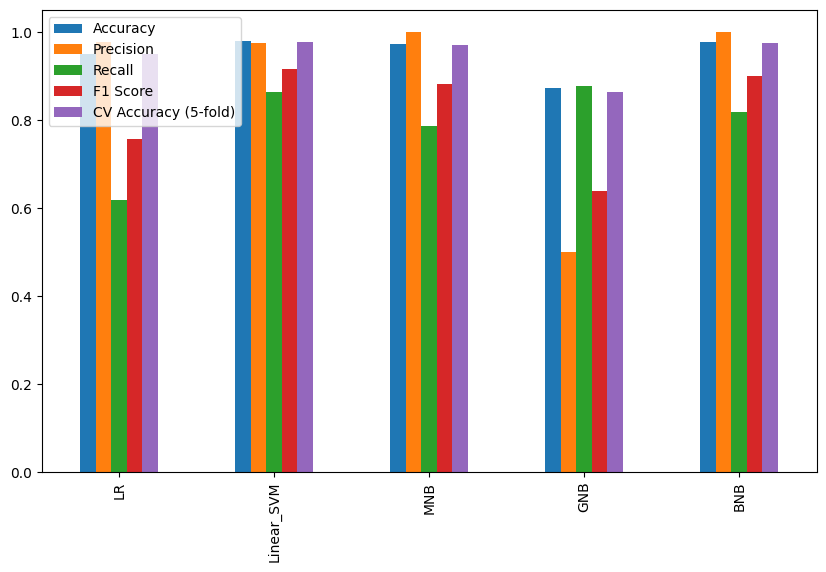

In [77]:
# Visualization
result_fc.T.plot(kind="bar", figsize=(10,6))

> # **Evaluation Metrics**
- Confusion Matrix
  1. False Positive (FP) → Important email marked as spam (BAD)
  2. False Negative (FN) → Spam enters inbox (less severe but annoying)

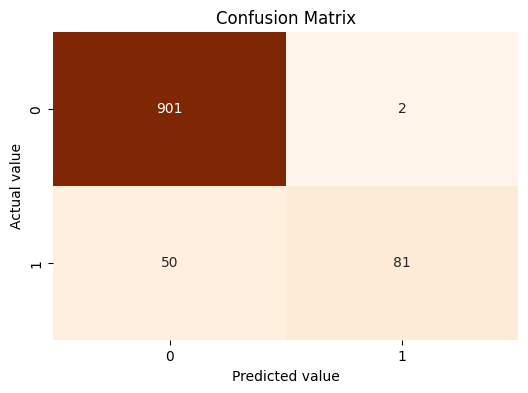

In [78]:
# Confusion matrix for the Logistic Regression (LR) model
y_pred = lr.predict(x_test)

conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

> # **Regularization helps**
- Prevent overfitting
- Stabilize coefficients
- Improve generalization

In [80]:
# GridSearch for Logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 5, 10],
    "solver": ["liblinear"]   # supports L1
}

lr_1 = LogisticRegression(max_iter=2000)

grid_lr = GridSearchCV(
    lr_1,
    param_grid_lr,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

x, y = df_updated['text'],df_updated['target']

tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2), min_df=3)
x_vec = tfidf.fit_transform(x).toarray()

x_train, x_test, y_train, y_test = train_test_split(x_vec, y,
                                                    test_size=0.2,
                                                    random_state=20,
                                                    stratify=y)

grid_lr.fit(x_train, y_train)

print("Best Params:", grid_lr.best_params_)
print("Best CV F1:", grid_lr.best_score_)

Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1: 0.9182571767560799


In [81]:
# Linear SVM Regularization

param_grid_svm = {                           # Small C → strong regularization
    "C": [0.01, 0.1, 1, 5, 10]               # Large C → weak regularization
}

svm = SVC(kernel="linear")

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_svm.fit(x_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best CV F1:", grid_svm.best_score_)

Best SVM Params: {'C': 1}
Best CV F1: 0.9391055480442256


> Compare Regularized Results in DataFrame

In [82]:
results = {
    "LR_best": grid_lr.best_score_,
    "SVM_best": grid_svm.best_score_
}

pd.DataFrame(results, index=["CV F1"])

,LR_best,SVM_best
CV F1,0.918257,0.939106


> # Inspect Sparsity
- After training best LR model:
    1. If L1:
       - Many weights will be zero → feature selection effect.
    2. If L2:
       - Most weights small but non-zero.
       - This is strong interview material.

In [83]:
best_lr = grid_lr.best_estimator_
coef = best_lr.coef_[0]

print("Non-zero weights:", sum(coef != 0))

Non-zero weights: 3000


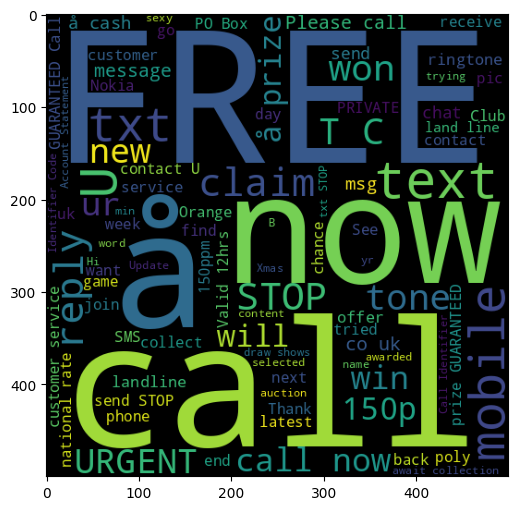

In [48]:
# the spam word cloud in raw text
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_text = " ".join(df_updated.loc[df_updated['target'] == 1, 'raw_text'])
spam_wc = wc.generate(spam_text)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

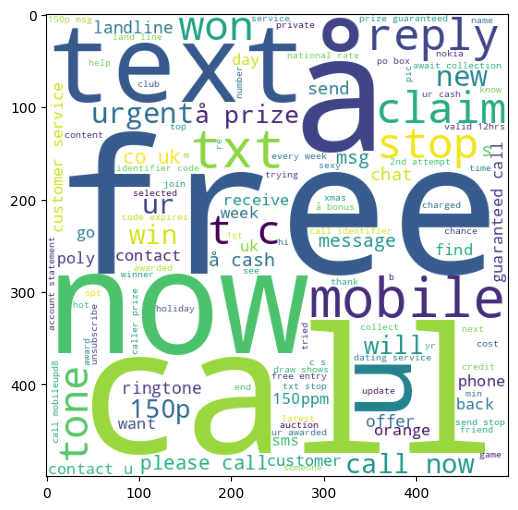

In [52]:
# the spam word cloud in cleaned
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_text = " ".join(df_updated.loc[df_updated['target'] == 1, 'cleaned'])
spam_wc = wc.generate(spam_text)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

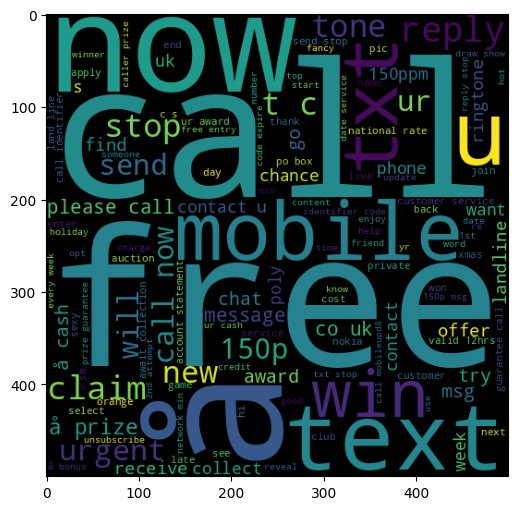

In [54]:
# the spam word cloud in lemmatized
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_text = " ".join(df_updated.loc[df_updated['target'] == 1, 'lemmatized'])
spam_wc = wc.generate(spam_text)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

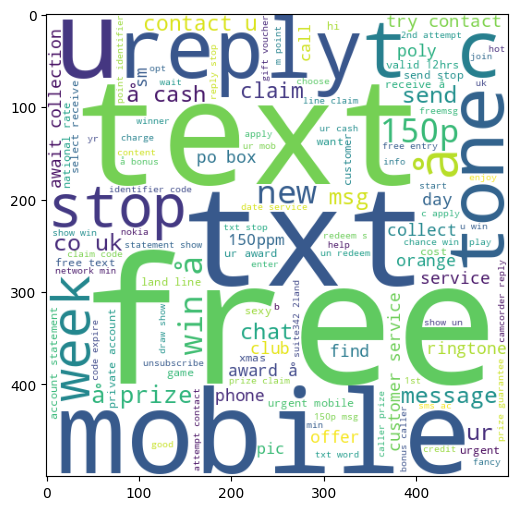

In [53]:
# the spam word cloud in no_stopword
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_text = " ".join(df_updated.loc[df_updated['target'] == 1, 'no_stopwords'])
spam_wc = wc.generate(spam_text)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

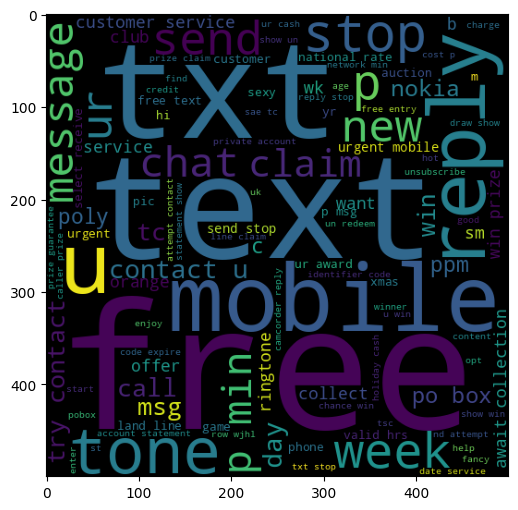

In [55]:
# the spam word cloud for fully cleaned
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_text = " ".join(df_updated.loc[df_updated['target'] == 1, 'fully_clean'])
spam_wc = wc.generate(spam_text)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

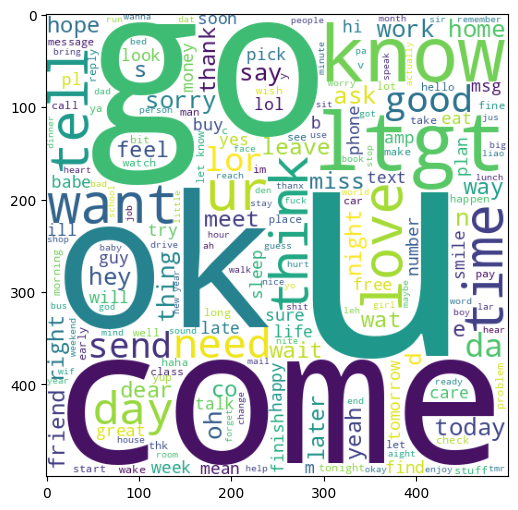

In [57]:
# the ham word cloud in fully cleaned
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_text = " ".join(df_updated.loc[df_updated['target'] == 0, 'fully_clean'])
spam_wc = wc.generate(spam_text)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)